<a href="https://colab.research.google.com/github/masp42/ML_Glass_CA/blob/main/CA_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/masp42/ML_Glass_CA/main/glass_data.csv", names=["ID","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"])

In [56]:
df.head(20)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [57]:
print(df.shape)

(214, 11)


In [58]:
df.dtypes

ID        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [59]:
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [60]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [61]:
Y = df ["ID"]
Y.head()

0    1
1    2
2    3
3    4
4    5
Name: ID, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


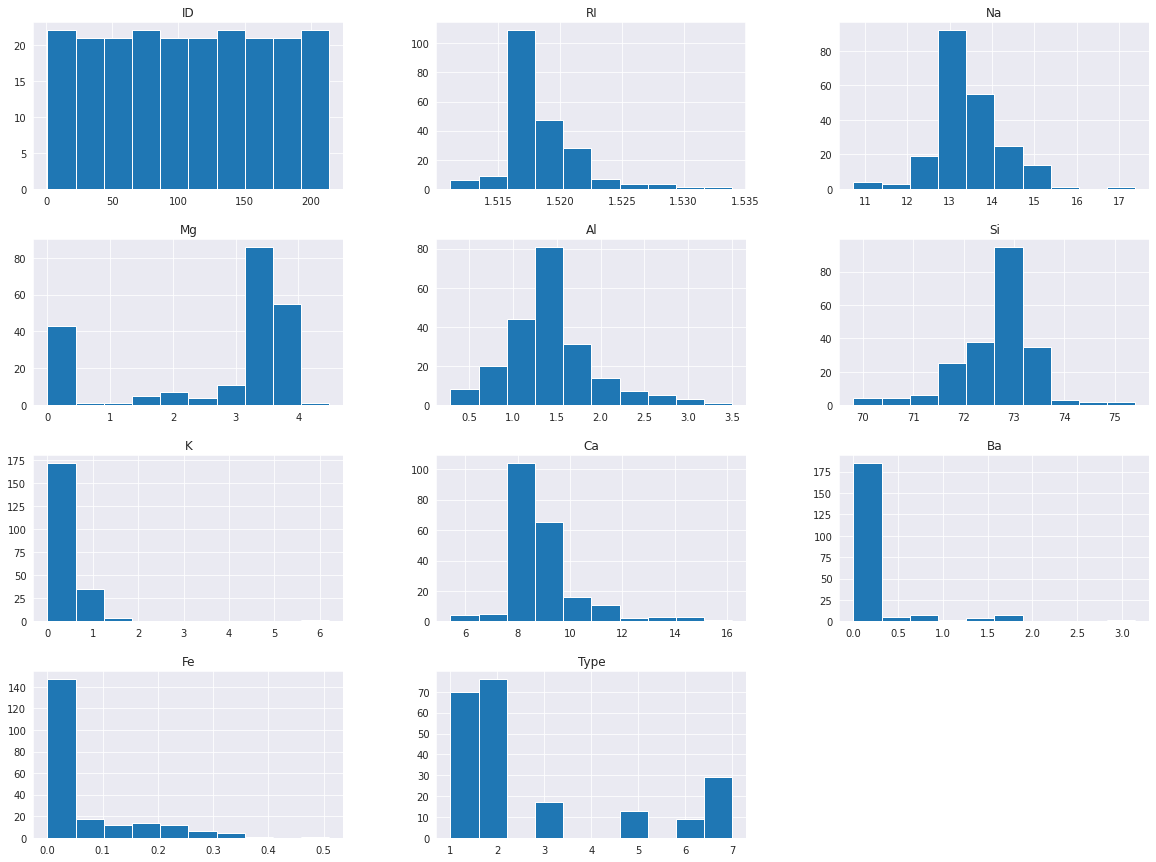

In [62]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

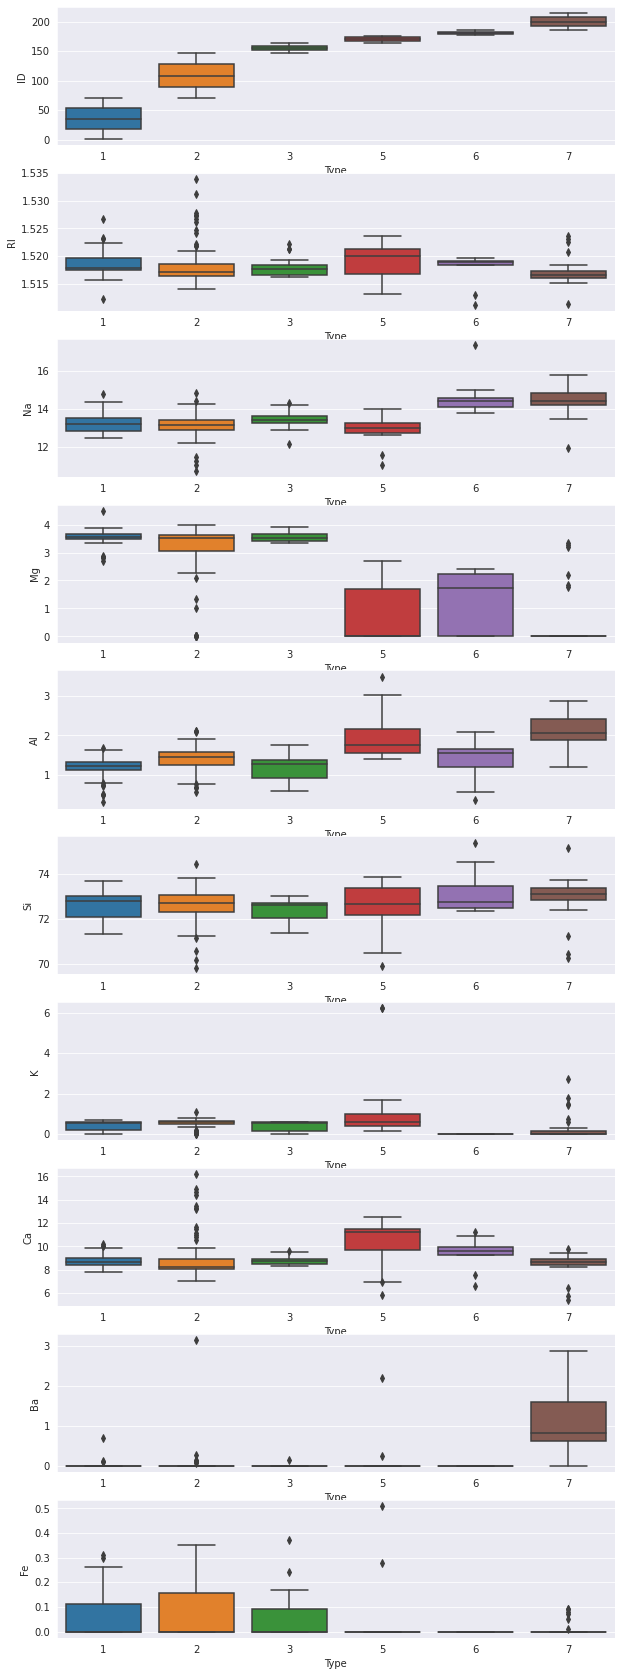

In [63]:
plot_X = df.iloc[:,:-1]
plot_y = df.iloc[:,-1]
plt.figure(figsize=(10,30))
for i,col in enumerate(plot_X,1):
    plt.subplot(10,1,i)
    sns.boxplot(y=col,x=plot_y, data=plot_X)
plt.show()

<Figure size 576x576 with 0 Axes>

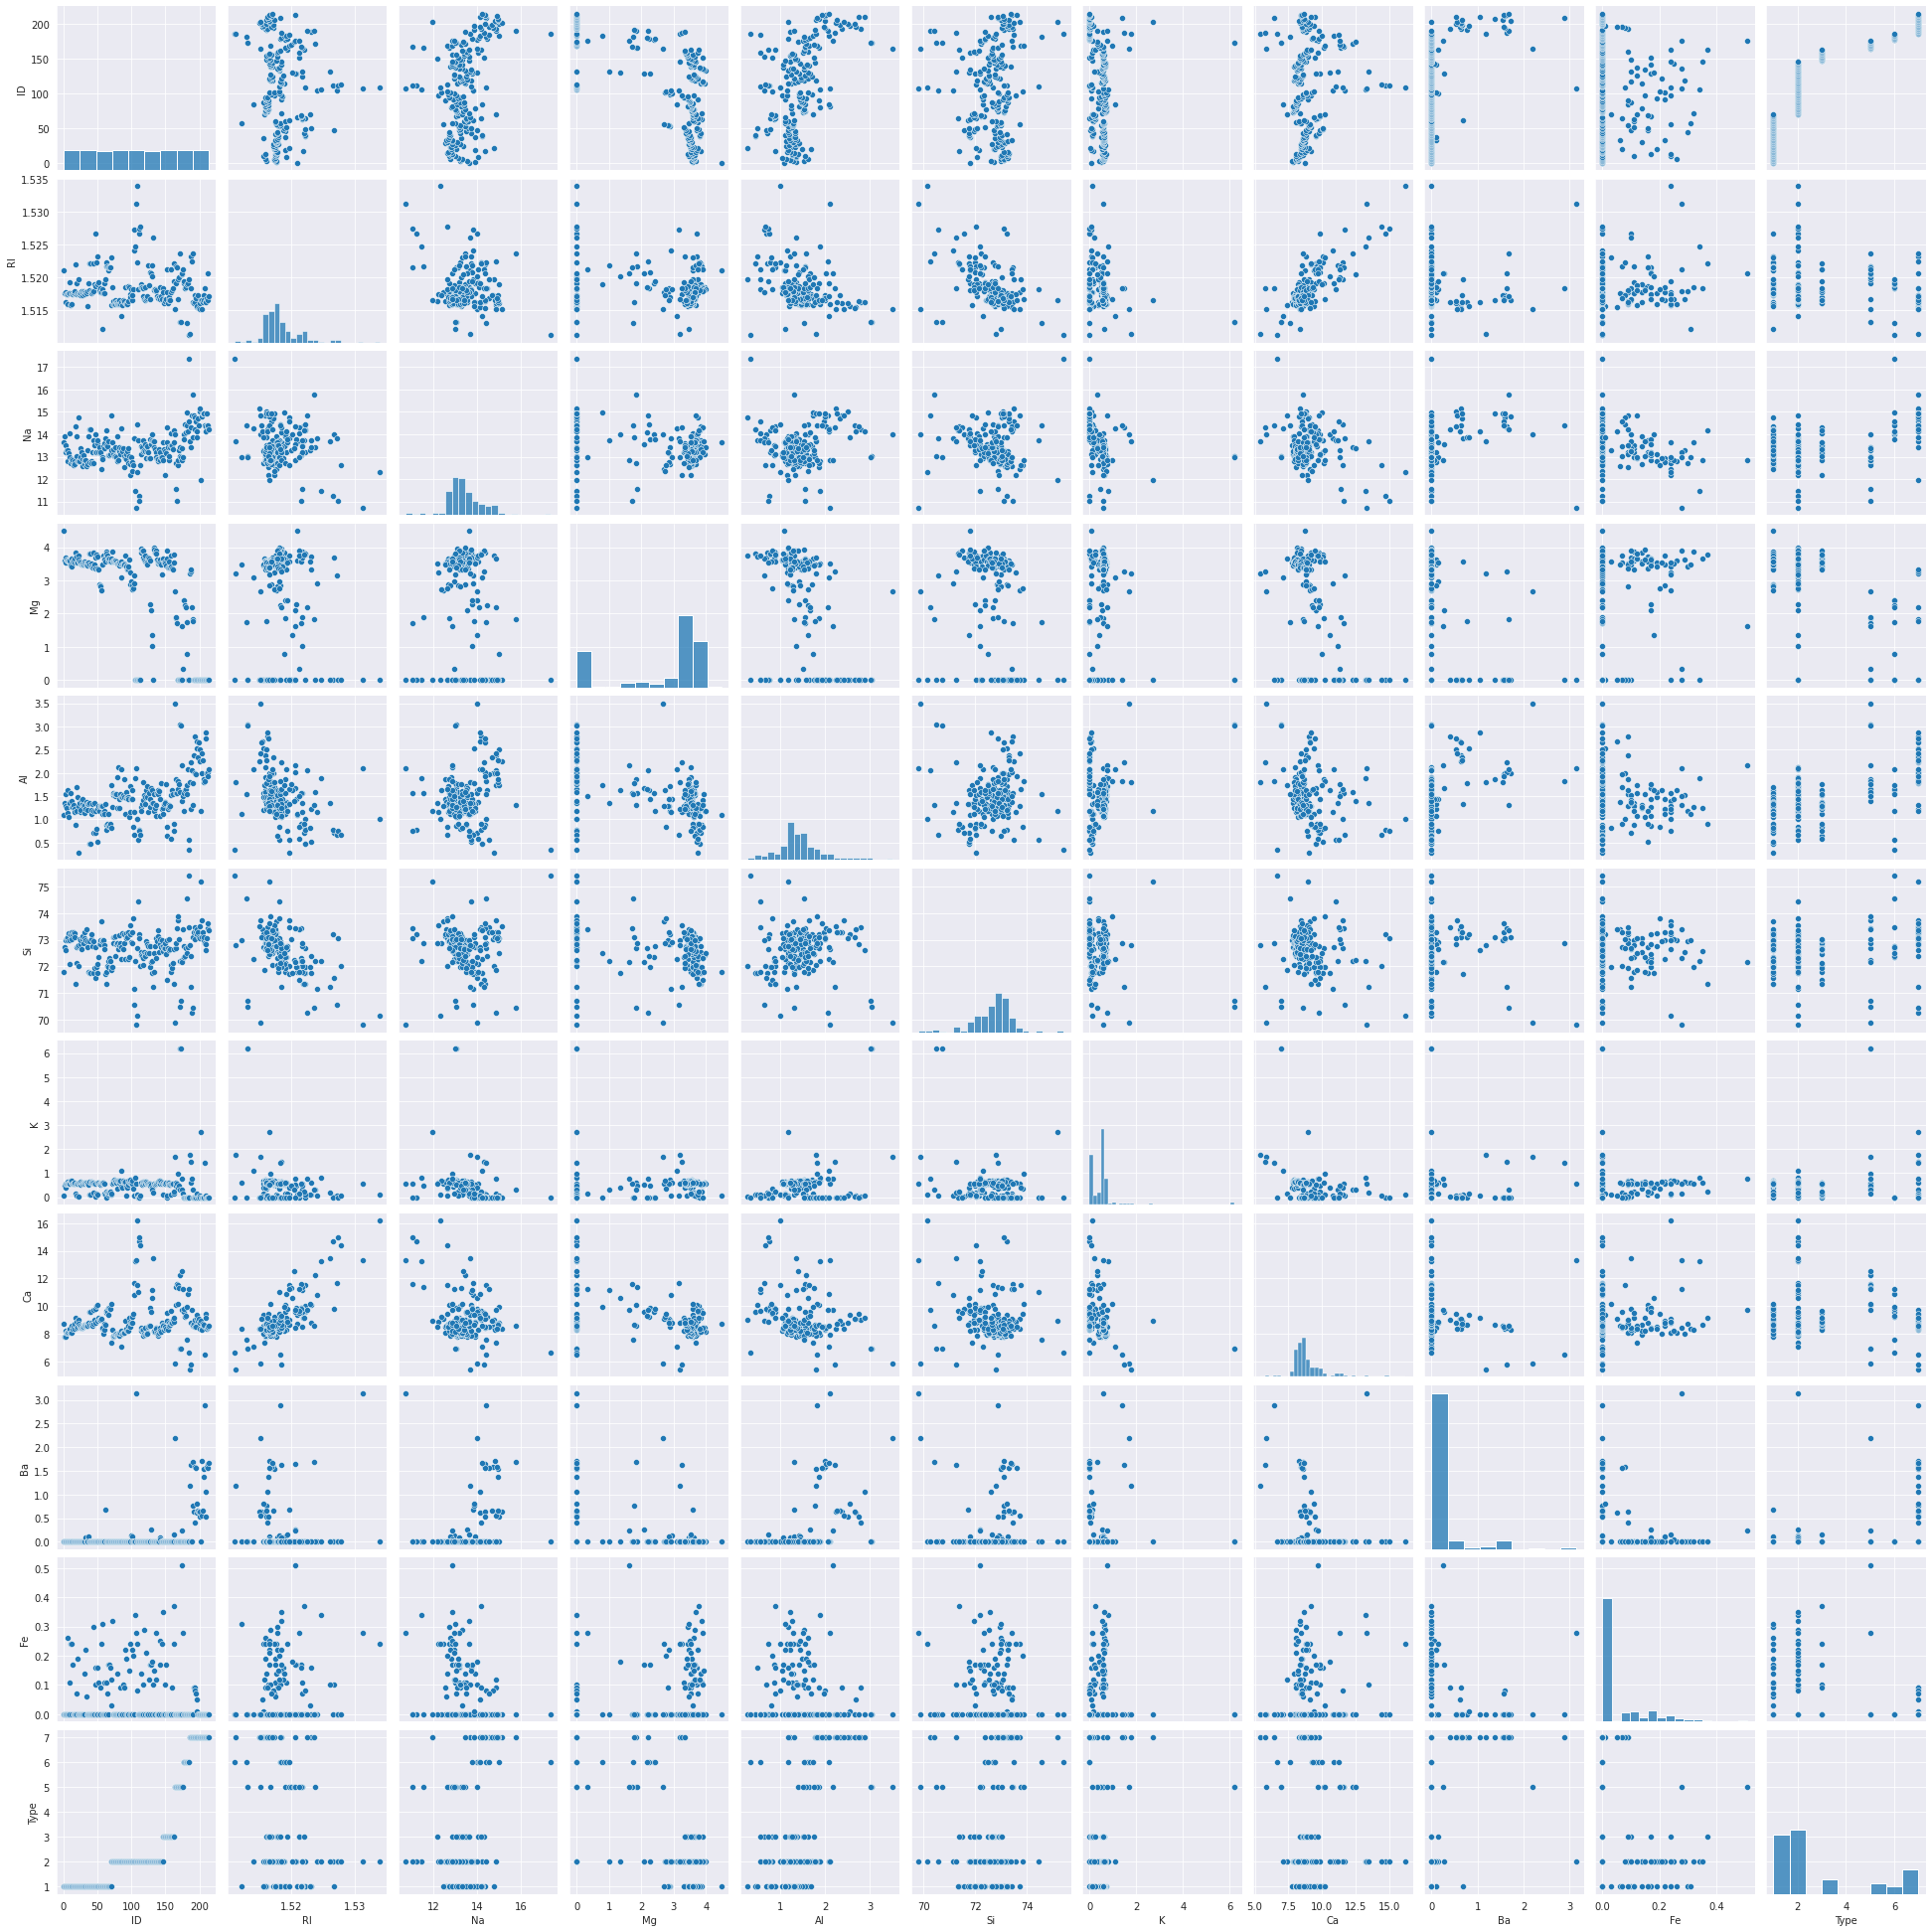

In [64]:
plt.figure(figsize=(8,8))
sns.pairplot(df,palette='coolwarm')
plt.show()

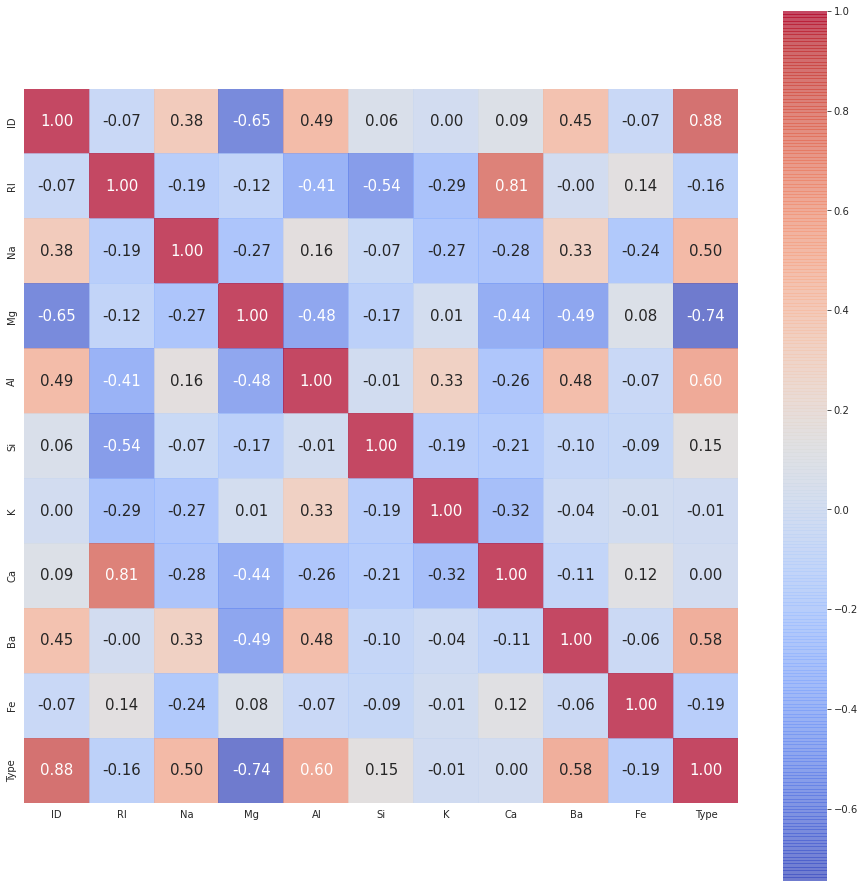

In [65]:
corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            alpha = 0.7,   cmap= 'coolwarm')
plt.show()


SPLITTING THE DATA INTO TRAINING SET AND TESTING SET
Here we had split the training and testing data into 80% and 20%.

In [66]:
x = df.drop('Type', axis = 1).values
y = df['Type'].values.reshape(-1,1)

In [67]:
# Splitting dataset into Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [68]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (171, 10)
Shape of x_test:  (43, 10)
Shape of y_train:  (171, 1)
Shape of y_test:  (43, 1)


CLASSIFICATION MODELS
LOGISTIC REGRESSION:-


In [69]:
# Fitting Logistic Rregression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier_lg = LogisticRegression()
steps = [
         ('scalar', StandardScaler()),
         ('model', LogisticRegression())
        ]
lg_pipe = Pipeline(steps)

In [70]:
parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000],
               'model__random_state' : [42]
}
classifier_lg = GridSearchCV(lg_pipe, parameters, cv = 3)
classifier_lg = classifier_lg.fit(x_train, y_train.ravel())

In [71]:
from sklearn.metrics import accuracy_score

y_pred_lg_train = classifier_lg.predict(x_train)
accuracy_lg_train = accuracy_score(y_train, y_pred_lg_train)
print("Training set accuracy: ", accuracy_lg_train)

y_pred_lg_test = classifier_lg.predict(x_test)
accuracy_lg_test = accuracy_score(y_test, y_pred_lg_test)
print("Test set accuracy: ", accuracy_lg_test)

Training set accuracy:  0.9941520467836257
Test set accuracy:  0.9767441860465116


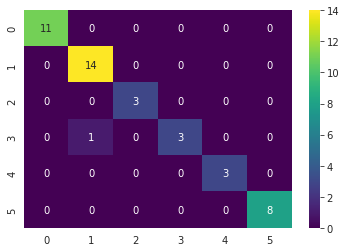

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        11
           2      0.933     1.000     0.966        14
           3      1.000     1.000     1.000         3
           5      1.000     0.750     0.857         4
           6      1.000     1.000     1.000         3
           7      1.000     1.000     1.000         8

    accuracy                          0.977        43
   macro avg      0.989     0.958     0.970        43
weighted avg      0.978     0.977     0.975        43



In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.heatmap(confusion_matrix(y_test, y_pred_lg_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_lg_test, digits=3))

KNN (WITH K=4):-


In [73]:
# KNN K-Nearest Neighbours 
# Fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
         ('scalar', StandardScaler()),
         ('model', KNeighborsClassifier())
        ]
knn_pipe = Pipeline(steps)

In [74]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1],
               
}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv = 3)
classifier_knn = classifier_knn.fit(x_train, y_train.ravel())

In [75]:
y_pred_knn_train = classifier_knn.predict(x_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set accuracy: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(x_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set accuracy: ", accuracy_knn_test)

Training set accuracy:  1.0
Test set accuracy:  0.9767441860465116


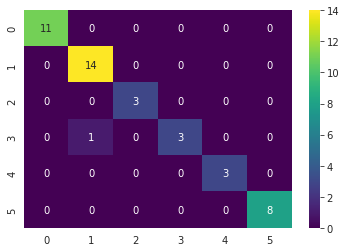

              precision    recall  f1-score   support

           1      0.917     1.000     0.957        11
           2      1.000     0.929     0.963        14
           3      1.000     1.000     1.000         3
           5      1.000     1.000     1.000         4
           6      1.000     1.000     1.000         3
           7      1.000     1.000     1.000         8

    accuracy                          0.977        43
   macro avg      0.986     0.988     0.987        43
weighted avg      0.979     0.977     0.977        43



In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.heatmap(confusion_matrix(y_test, y_pred_lg_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_knn_test, digits=3))

SVM (SUPPORT VECTOR MACHINE LINEAR):-


In [77]:
# Support vector machine SVM
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
         ('scalar', StandardScaler()),
         ('model', SVC())
        ]
svm_linear_pipe = Pipeline(steps)

In [78]:
parameters = { 'model__kernel' : ['linear'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42]
}
classifier_svm_linear = GridSearchCV(svm_linear_pipe, parameters, cv = 3)
classifier_svm_linear = classifier_svm_linear.fit(x_train, y_train.ravel())

In [79]:
y_pred_svm_linear_train = classifier_svm_linear.predict(x_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set accuracy: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(x_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set accuracy: ", accuracy_svm_linear_test)

Training set accuracy:  1.0
Test set accuracy:  0.9534883720930233


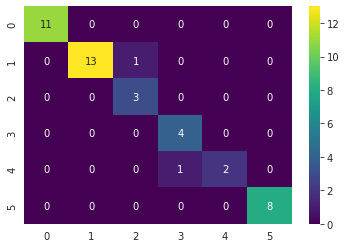

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        11
           2      1.000     0.929     0.963        14
           3      0.750     1.000     0.857         3
           5      0.800     1.000     0.889         4
           6      1.000     0.667     0.800         3
           7      1.000     1.000     1.000         8

    accuracy                          0.953        43
   macro avg      0.925     0.933     0.918        43
weighted avg      0.964     0.953     0.954        43



In [80]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_svm_linear_test, digits=3))

DECISION TREE CLASIFIER (CART):-

In [81]:
# Decision Tree Classifier Cart
# Fitting CLassifier to the Training set
from sklearn.tree import DecisionTreeClassifier 
classfier_dt = DecisionTreeClassifier()
steps = [
         ('scalar', StandardScaler()),
         ('model', DecisionTreeClassifier())
        ]
dt_pipe = Pipeline(steps)

In [82]:
# Applying Grid to find the best model and the best parameters
parameters = [ { 'model__max_depth' : np.arange(1,21),
                 'model__min_samples_leaf' : [1, 5, 10, 20, 50, 100],
                 'model__min_samples_split' : np.arange(2, 11),
                 'model__criterion' : ["gini"],
                 'model__random_state' : [42]}
]

classifier_dt = GridSearchCV(estimator = dt_pipe,
                             param_grid = parameters,
                             cv = 3,
                             n_jobs = -1)
classifier_dt = classifier_dt.fit(x_train, y_train.ravel())

In [83]:
y_pred_dt_train = classifier_dt.predict(x_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set accuracy: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(x_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set accuracy: ", accuracy_dt_test)

Training set accuracy:  1.0
Test set accuracy:  0.9767441860465116


Confusion matrix and classification metrics for CART:-


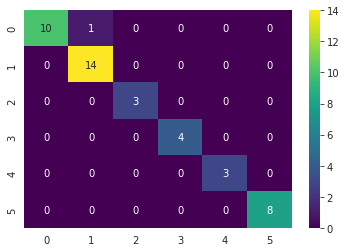

              precision    recall  f1-score   support

           1      1.000     0.909     0.952        11
           2      0.933     1.000     0.966        14
           3      1.000     1.000     1.000         3
           5      1.000     1.000     1.000         4
           6      1.000     1.000     1.000         3
           7      1.000     1.000     1.000         8

    accuracy                          0.977        43
   macro avg      0.989     0.985     0.986        43
weighted avg      0.978     0.977     0.977        43



In [84]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_dt_test, digits=3))

RANDOM FOREST CLASSIFICATION :

In [85]:
# Random Forest Classification
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()
steps = [
         ('scalar', StandardScaler()),
         ('model', RandomForestClassifier())
        ]
rf_pipe = Pipeline(steps)

In [89]:
parameters = [ { 'model__n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                 'model__max_features' : ["auto", "sqrt"],
                 'model__max_depth' : np.linspace(10, 110, num = 11),
                 'model__min_samples_split' : [2, 5, 10],
                 'model__min_samples_leaf' : [1, 2, 4],
                 'model__bootstrap' : [True, False],
                 'model__criterion' : ["gini"],
                 'model__random_state' : [42]}
]

classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                             param_distributions = parameters,
                             n_iter = 100,
                             cv = 3,
                             random_state = 42,
                             verbose = 4,
                             n_jobs = -1)
classifier_rf = classifier_rf.fit(x_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [90]:
y_pred_rf_train = classifier_rf.predict(x_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set accuracy: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(x_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set accuracy: ", accuracy_rf_test)

Training set accuracy:  1.0
Test set accuracy:  1.0
